In [20]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [21]:
sns.set()

In [22]:
measure=pd.Series([24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00])

In [23]:
company=['Allied Signal','Bankers Trust','General Mills','ITT Industries','J.P.Morgan & Co.','Lehman Brothers',
      'Marriott','MCI','Merrill Lynch','Microsoft','Morgan Stanley','Sun Microsystems','Travelers','US Airways',
      'Warner-Lambert']

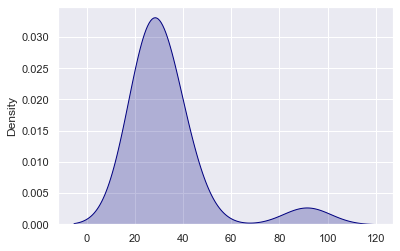

In [24]:
#display distribution
p= sns.kdeplot(data=measure,fill=True,color="navy")

* the distribution is bimodal  
* the distribution is right skewed  

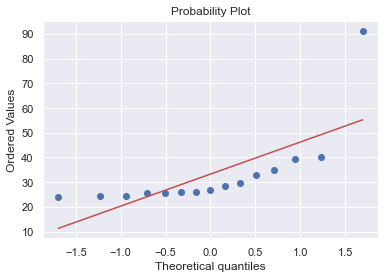

In [33]:
#Review QQ Plot 
import scipy.stats as stats
import pylab
res = stats.probplot(measure,dist="norm",plot=plt)

distribution is not gaussian

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

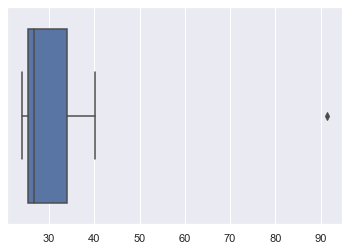

In [34]:
# Box Plot to find outliers
sns.boxplot(measure)

In [37]:
df = pd.DataFrame(measure)

In [39]:
df.columns= ['measures']

In [40]:
df

,measures
0,24.23
1,25.53
2,25.41
3,24.14
4,29.62
5,28.25
6,25.81
7,24.39
8,40.26
9,32.95


In [42]:
#function to get outliers from all numeric features
def IQR_Outliers (X, features):
    
    Outlier_df = pd.DataFrame()
    ulimit=[]
    llimit=[]
    no_of_outliers =[]
    perc = []
    feature = []


    indices = [x for x in X.index]
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        
        feature.append(col)        
        ulimit.append(upper)
        llimit.append(lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        

        no_of_outliers.append(len(outliers))
        perc.append(round((len(outliers)*100)/len(indices),2))

        out_indexlist.extend(outliers_index)
    
    Outlier_df['feature'] = feature
    Outlier_df['no_of_outliers']= no_of_outliers 
    Outlier_df['percentage']= perc
    Outlier_df['upper_limit']= ulimit
    Outlier_df['lower_limit']= llimit
                   
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    return Outlier_df   


In [44]:
#get outliers 
IQR_Outliers(df, ['measures'])

Number of samples:  15

Number of rows with outliers:  1


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,measures,1,6.67,46.7325,12.7125


we have one outlier above 46.7 (91.36)

In [45]:
#mean
df.mean()

measures    33.271333
dtype: float64

In [46]:
#variance
df.var()

measures    287.146612
dtype: float64

In [47]:
#standard deviation
df.std()

measures    16.945401
dtype: float64